In [1]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.4.1
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [2]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3 MB 63 kB/s s eta 0:00:01    |███████████████████████▋        | 80.7 MB 59.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 488 kB 50.6 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cloud 0.1.13 requires tensorboard>=2.3.0, but you have tensorboard 1.14.0 which is incomp

# Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Import Data and Preprocessing

In [4]:
train_dir = '../input/chili-plant-disease/train'
val_dir = '../input/chili-plant-disease/val'
test_dir = '../input/chili-plant-disease/test'

In [5]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    zoom_range=0.2
)
val_test_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=False
)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


# Model Spesification

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

# Training Model

In [8]:
history = model.fit(
            train_data,
            validation_data=val_data, 
            epochs=500)

Epoch 1/500
13/13 [==============================] - 7s 523ms/step - loss: 2.6131 - acc: 0.2325 - val_loss: 1.6129 - val_acc: 0.2000
Epoch 2/500
13/13 [==============================] - 4s 319ms/step - loss: 2.0976 - acc: 0.3050 - val_loss: 1.6344 - val_acc: 0.2000
Epoch 3/500
13/13 [==============================] - 4s 324ms/step - loss: 1.8861 - acc: 0.3375 - val_loss: 1.6774 - val_acc: 0.1600
Epoch 4/500
13/13 [==============================] - 4s 315ms/step - loss: 1.6901 - acc: 0.3800 - val_loss: 1.7637 - val_acc: 0.2000
Epoch 5/500
13/13 [==============================] - 4s 310ms/step - loss: 1.6010 - acc: 0.3875 - val_loss: 1.8310 - val_acc: 0.2000
Epoch 6/500
13/13 [==============================] - 4s 316ms/step - loss: 1.5626 - acc: 0.3875 - val_loss: 1.7935 - val_acc: 0.2800
Epoch 7/500
13/13 [==============================] - 4s 307ms/step - loss: 1.5952 - acc: 0.3800 - val_loss: 1.7667 - val_acc: 0.2000
Epoch 8/500
13/13 [==============================] - 4s 310ms/step - 

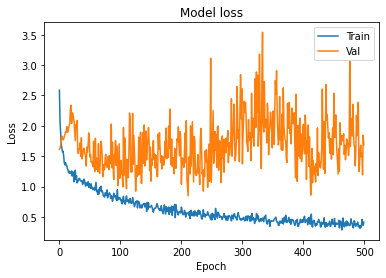

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

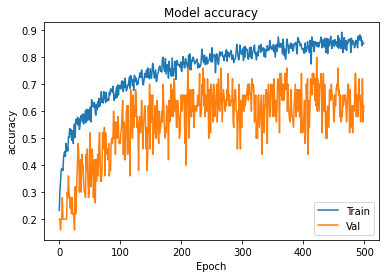

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Testing Model

In [11]:
y_test = test_data.labels

In [12]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4], dtype=int32)

In [13]:
y_pred = model.predict_classes(test_data)

In [14]:
accuracy_score(y_test, y_pred)

0.86

In [15]:
confusion_matrix(y_test, y_pred)

array([[ 8,  1,  1,  0,  0],
       [ 1,  9,  0,  0,  0],
       [ 0,  0,  9,  0,  1],
       [ 0,  0,  0, 10,  0],
       [ 0,  3,  0,  0,  7]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.69      0.90      0.78        10
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        10
           4       0.88      0.70      0.78        10

    accuracy                           0.86        50
   macro avg       0.87      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



## save model architectur picture as png file

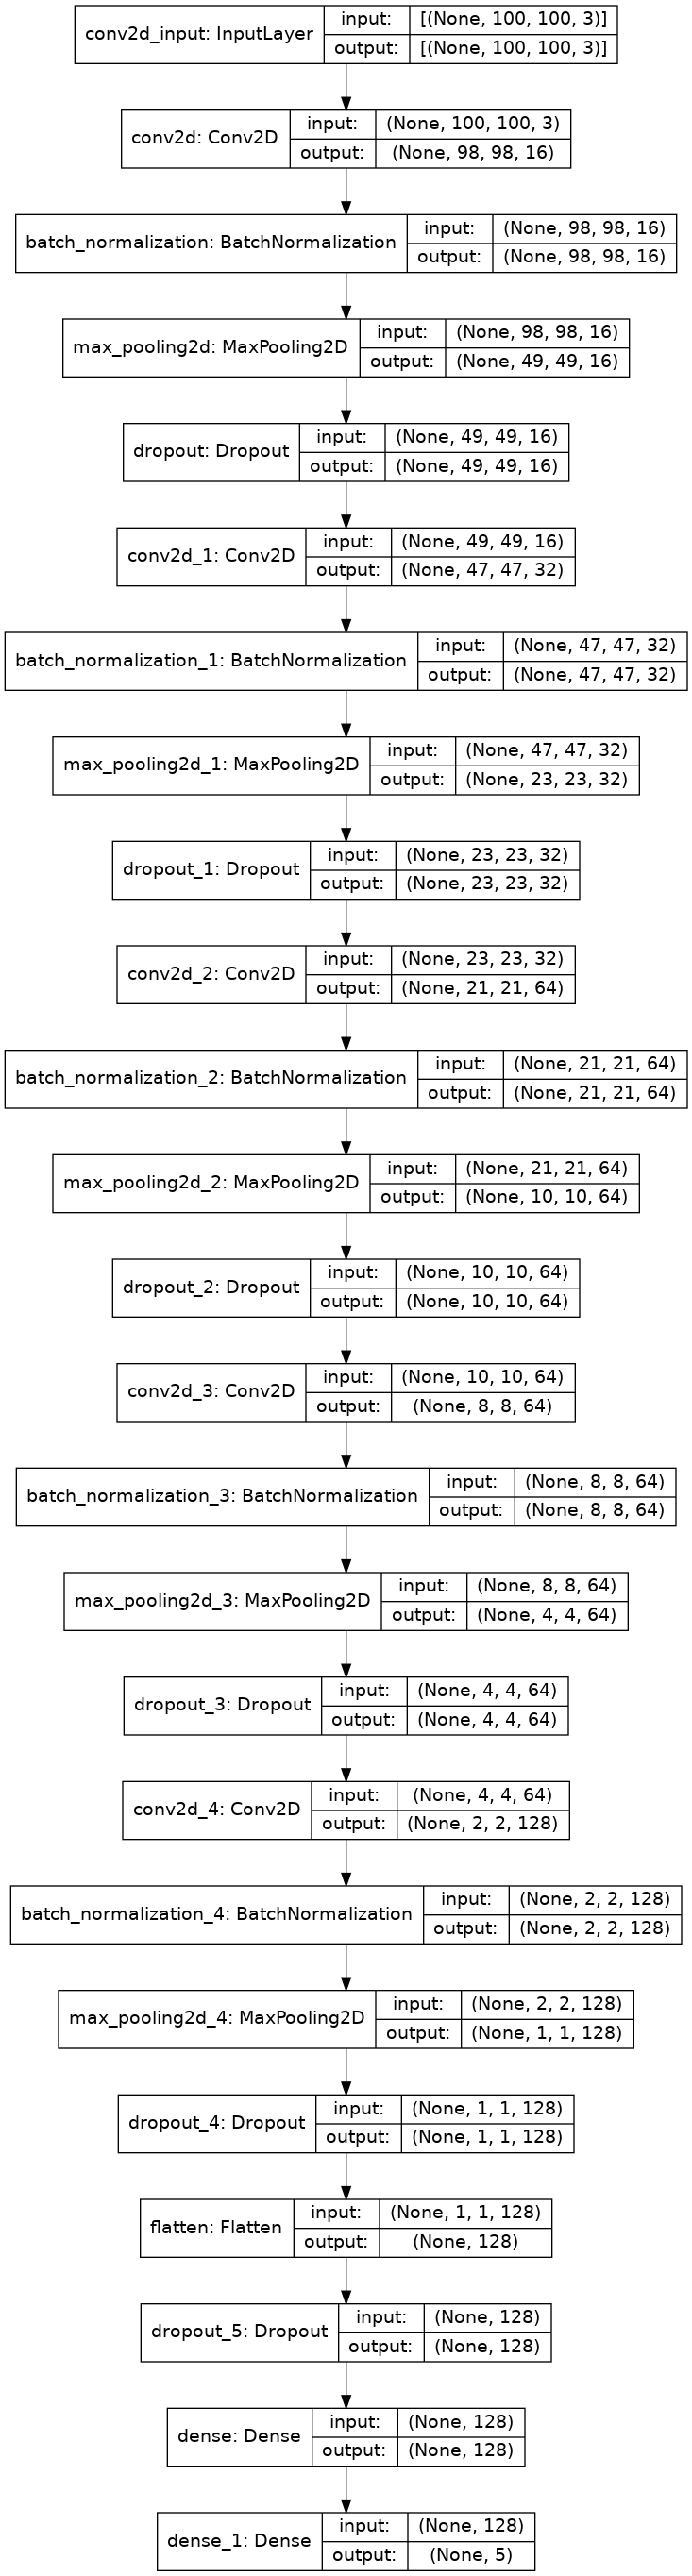

In [17]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

# Save Model

In [18]:
#save architecture as json and weight as h5
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")